In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install plotly


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import warnings
warnings.simplefilter('ignore')

## Читання та перегляд набору даних

Read csv file

In [4]:
print(os.path.exists("../data/dataset.csv"))

True


In [5]:
ds = pd.read_csv("../data/dataset.csv")

Цей датасет містить результати опитування задоволеності пасажирів авіакомпанії.

In [6]:
print('кількість стовпців - ',len(ds.columns), '\n')
print('стовпці: ',list(ds.columns))

кількість стовпців -  25 

стовпці:  ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [7]:
print('Кількість зразків: ',ds.shape[0])

Кількість зразків:  129880


In [8]:
display(ds.head(5))

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Перевірка пропущених даних

In [9]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [10]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  Arrival Delay in Minutes


In [11]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Arrival Delay in Minutes 393


Перевірка на наявність повторюваних значень у даних

In [12]:
ds.duplicated().sum()

0

In [13]:
# видалення непотрібного стовпця за допомогою методу drop
ds.drop('Unnamed: 0', axis = 1, inplace = True)

## Кількість унікальних значень

In [14]:
ds.nunique()

id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              466
Arrival Delay in Minutes        

## Отримання описових статистик для датасету

In [15]:
ds.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000



Для стовпця "Вік" ми бачимо, що наймолодший пасажир має 7 років, а найстарший - 85 років. Середній вік становить 39 років. При оцінці квартилів ми бачимо, що вік рівномірно розподілений.

Для стовпця "Відстань польоту" бачимо, що мінімальне значення становить 31, а максимальне - 4983. Середня відстань польоту складає 1190. При огляді квартилів ми можемо сказати, що є викиди, оскільки є велика різниця між третім квартилем та максимальним значенням.

Для стовпців "Затримка відправлення в хвилинах" та "Затримка прибуття в хвилинах" мінімальне значення становить 0 (що відповідає відсутності затримки у цих польотах), а максимальне значення становить близько 1580. При огляді третього квартилю та максимальних значень ми бачимо, що є багато викидних значень.

Є багато категоріальних ознак, які оцінюються на 0-1-2-3-4-5 балів. Якщо ми оглянемо середні значення цих оцінок, найвищий рівень задоволення спостерігається в категорії "Обслуговування під час польоту" з середнім значенням 3,64, тоді як найнижчий рівень спостерігається в категорії "Обслуговування Wi-Fi під час польоту" з середнім значенням 2,72 бала.

## Опис типів значень

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

## EDA(процес дослідження даних)

Візуалізація цільового стовпця

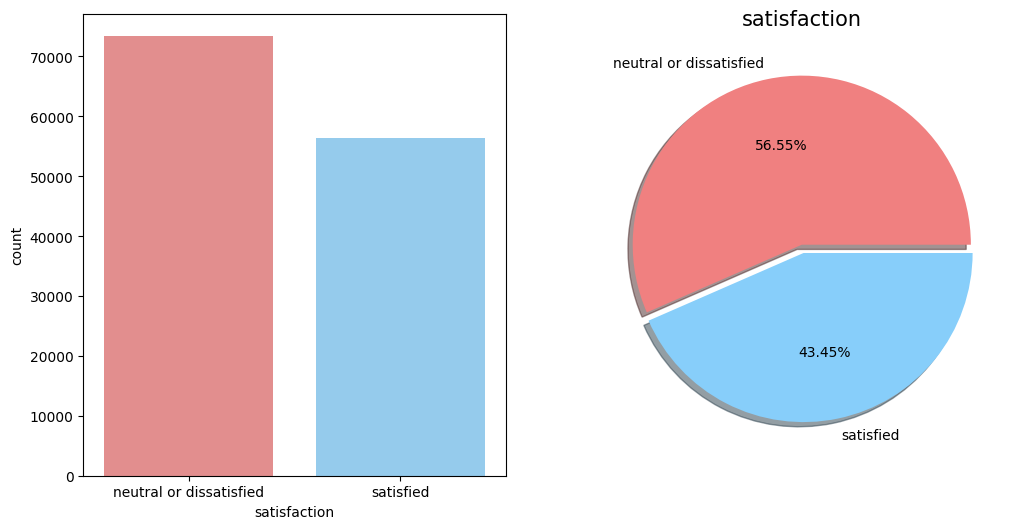

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', data=ds, palette=["#f08080","#87cefa"])

plt.subplot(1, 2, 2)
plt.pie(ds['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('satisfaction', fontsize=15)

plt.show()

Наш цільовий стовпець складається з двох категорій: «нейтральний або незадоволений» і «задоволений». Кількість нейтральних або незадоволених пасажирів є вищою в даних. Як показано на графіку, можна сказати, що у нас немає проблеми дисбалансу.

Візуалізація категоріальних ознак

Female    65899
Male      63981
Name: Gender, dtype: int64


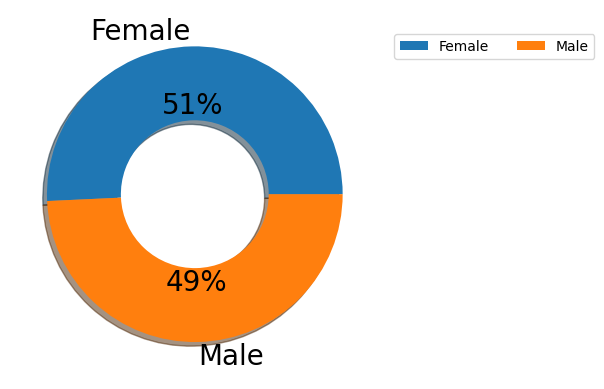

In [18]:
## Скільки чоловіків і жінок подорожували?
g=ds["Gender"].value_counts()
print(g)
plt.pie(g,labels=ds["Gender"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.5},textprops={"fontsize":20})
plt.legend(loc="center right",bbox_to_anchor=(1.6, 0.9),ncol=2);

Загалом, за даними датасету, статевий склад пасажирів авіакомпанії є рівномірним, оскільки кількість чоловіків та жінок приблизно однакова.

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64


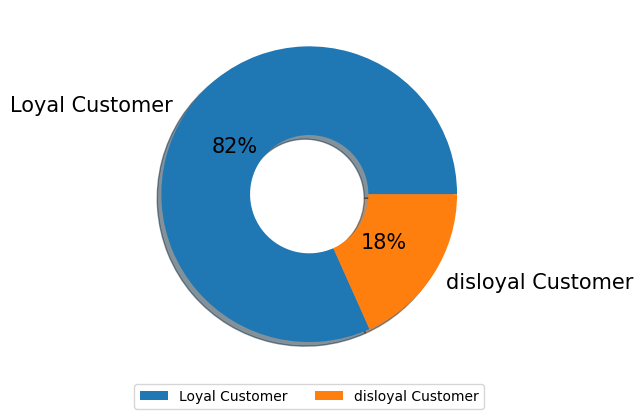

In [19]:
## Скільки типів клієнтів було
c=ds["Customer Type"].value_counts()
print(c)
plt.pie(c,labels=ds["Customer Type"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=2);

Більшість пасажирів є звичайними (лояльними) клієнтами авіакомпанії. Це може вказувати на високу репутацію авіакомпанії серед повторних пасажирів.

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64


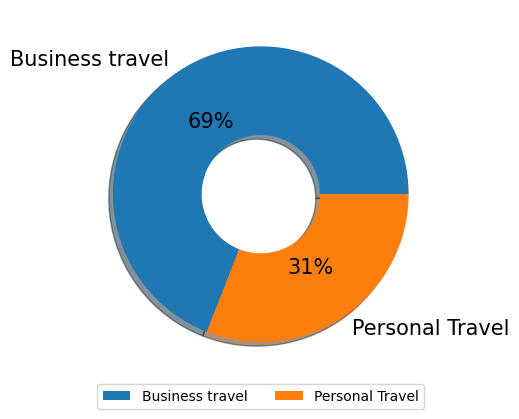

In [20]:
# Який вид подорожей був поширеним
t=ds["Type of Travel"].value_counts()
print(t)
plt.pie(t,labels=ds["Type of Travel"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=2);

Більшість пасажирів авіакомпанії подорожують з ціллю, пов'язаною з бізнесом. Це може вказувати на те, що авіакомпанія спеціалізується на обслуговуванні корпоративних клієнтів або має більшу присутність у сегменті бізнес-подорожей.

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


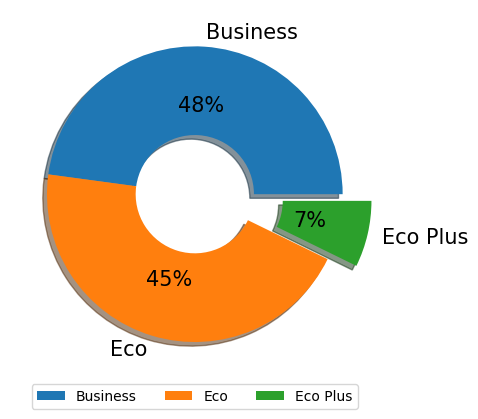

In [21]:
## Який клас пасажирів був найбільшим
c=ds["Class"].value_counts()
print(c)
plt.pie(c,labels=ds["Class"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15},explode=[0,0,0.2])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3)


Більшість пасажирів вибирає бізнес-клас або економ-клас. Клас "Економ-плюс" має найменший відсоток представлення серед пасажирів.

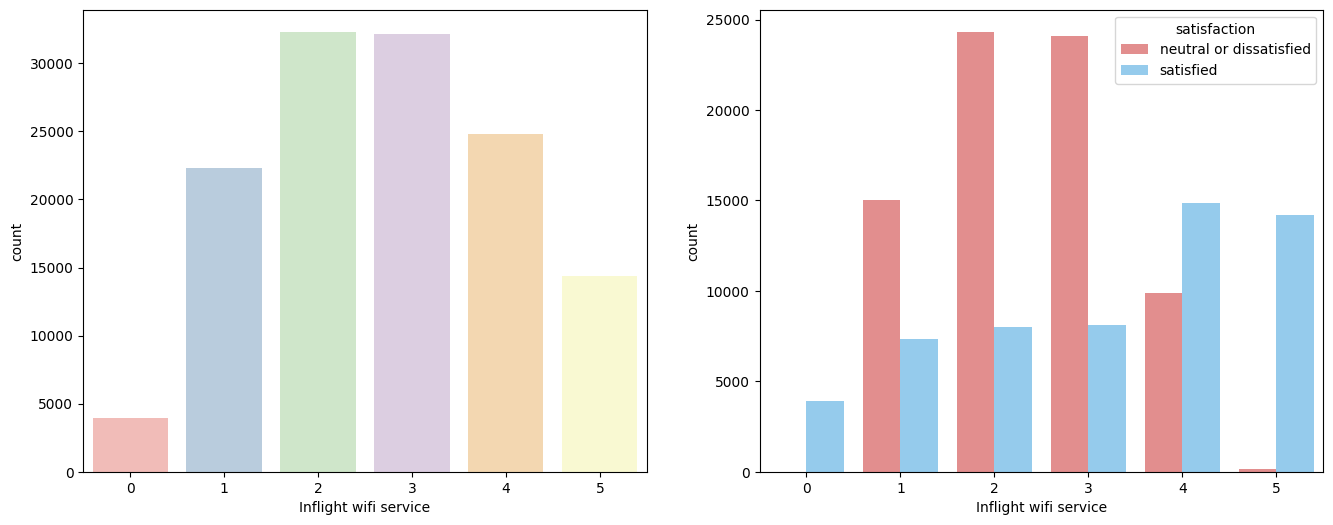

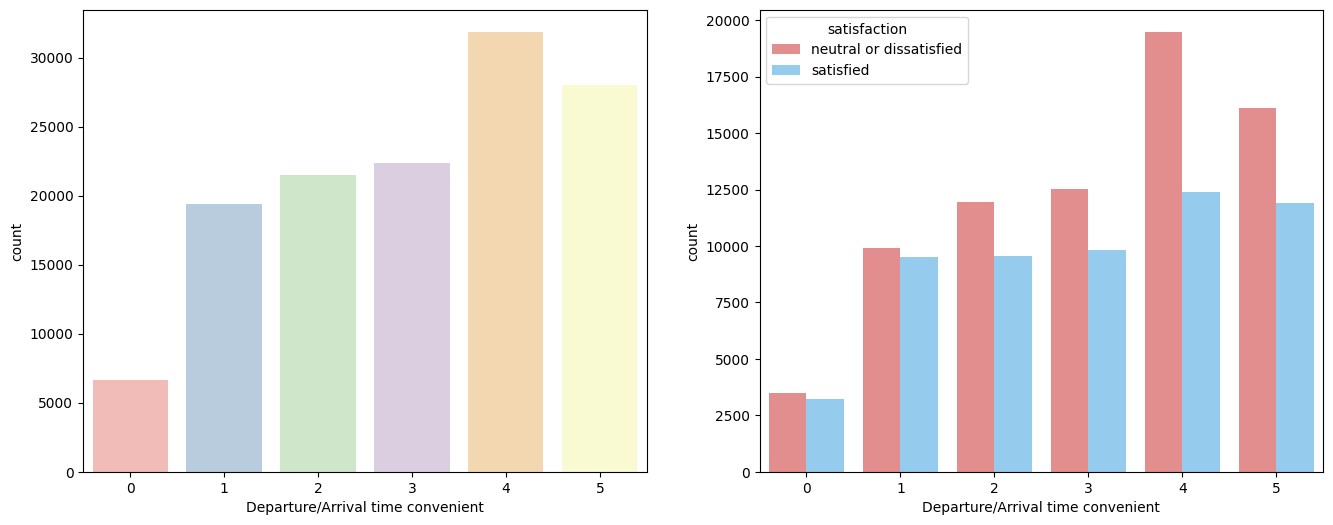

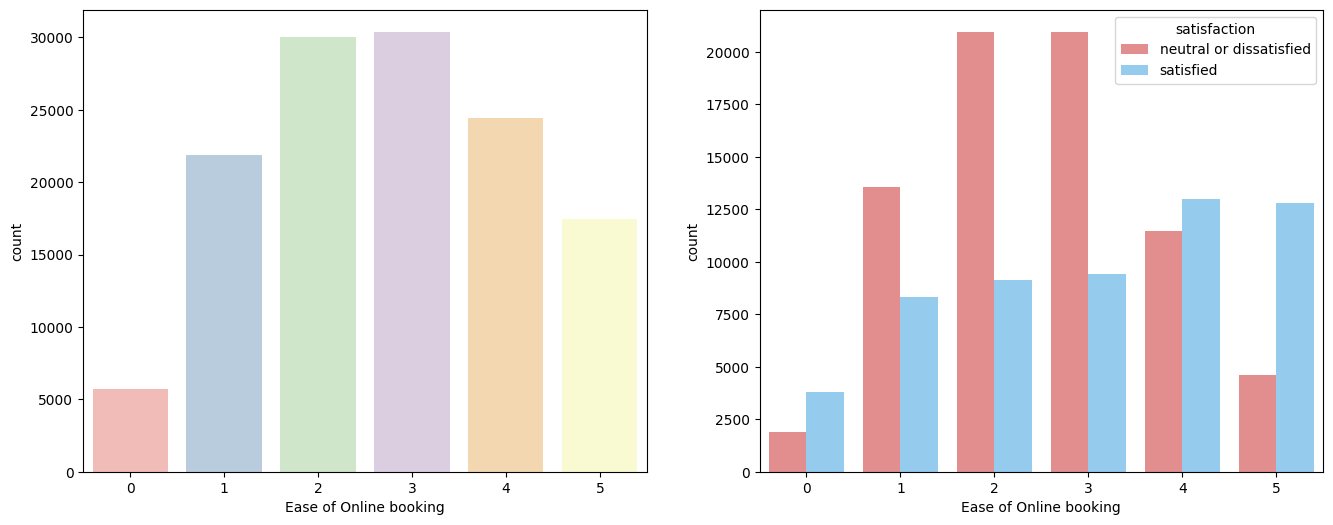

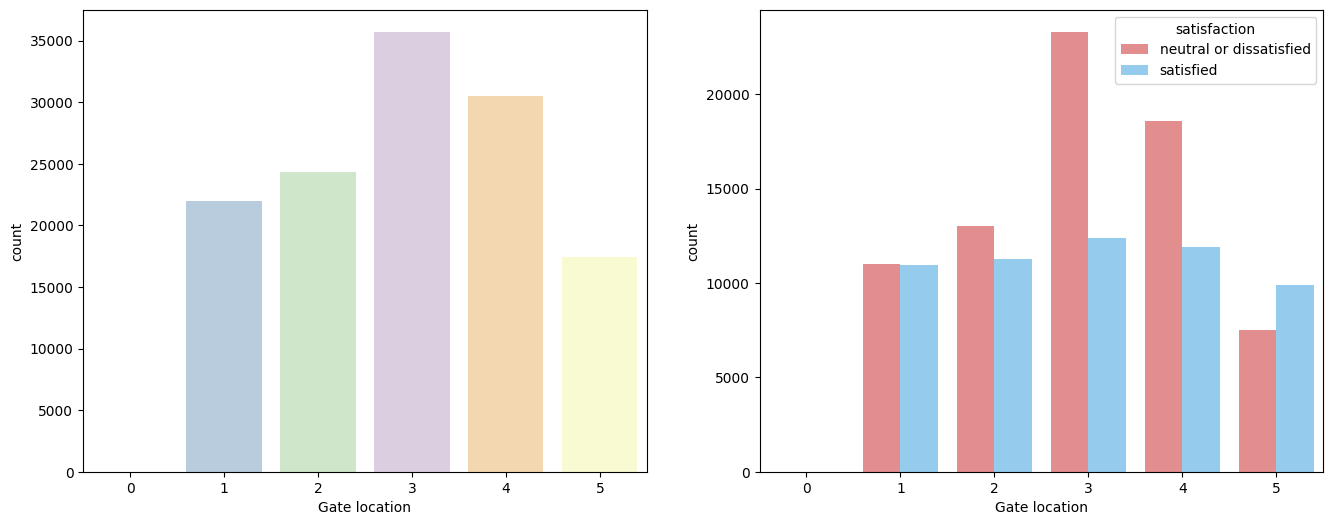

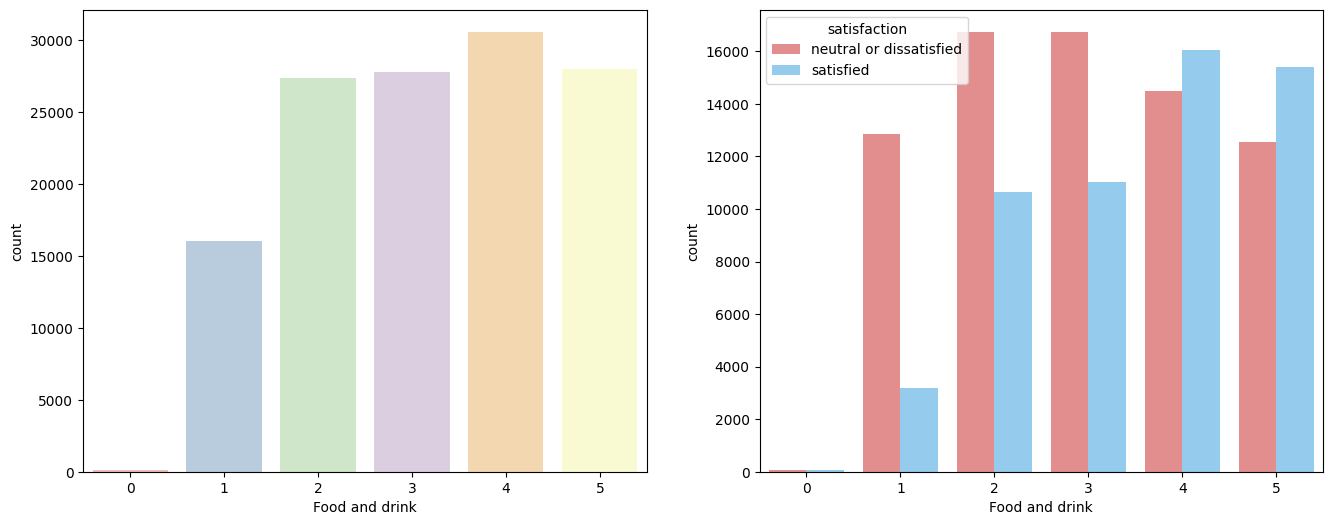

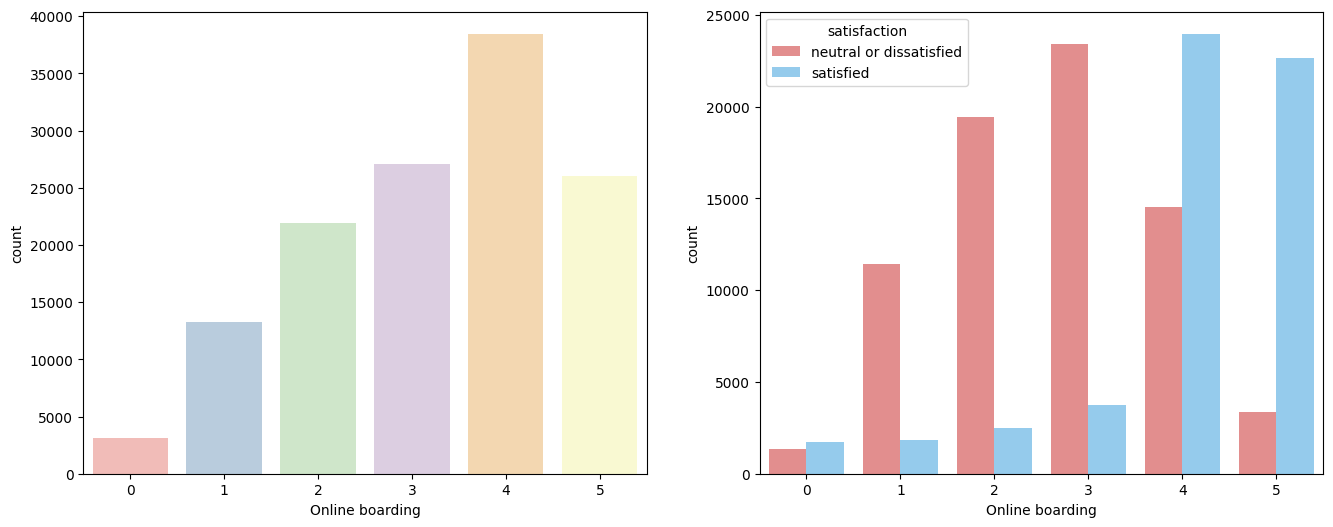

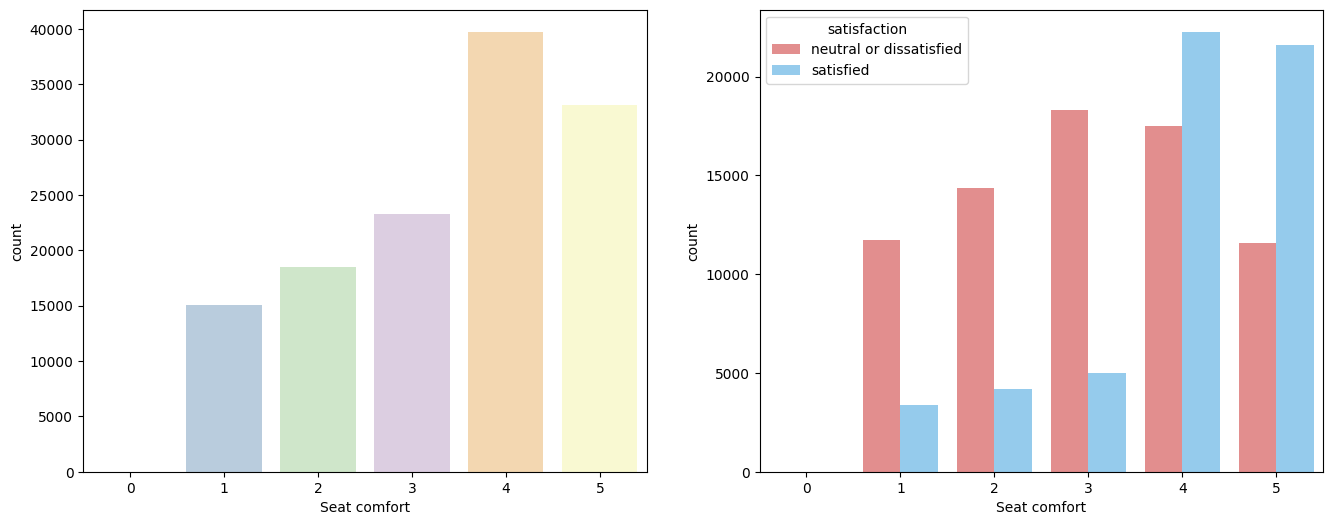

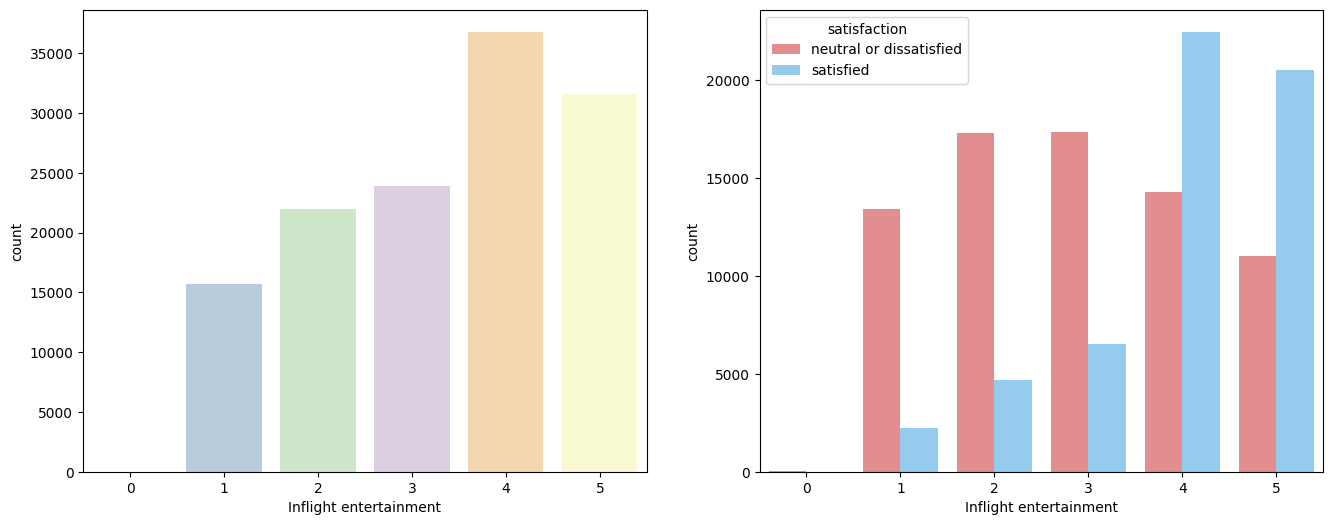

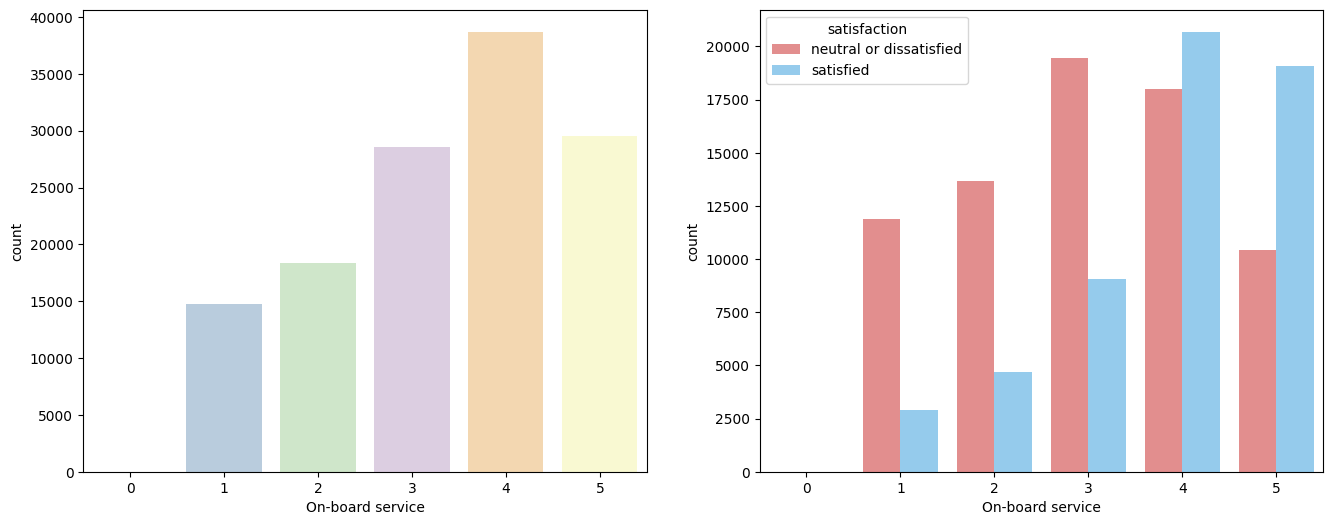

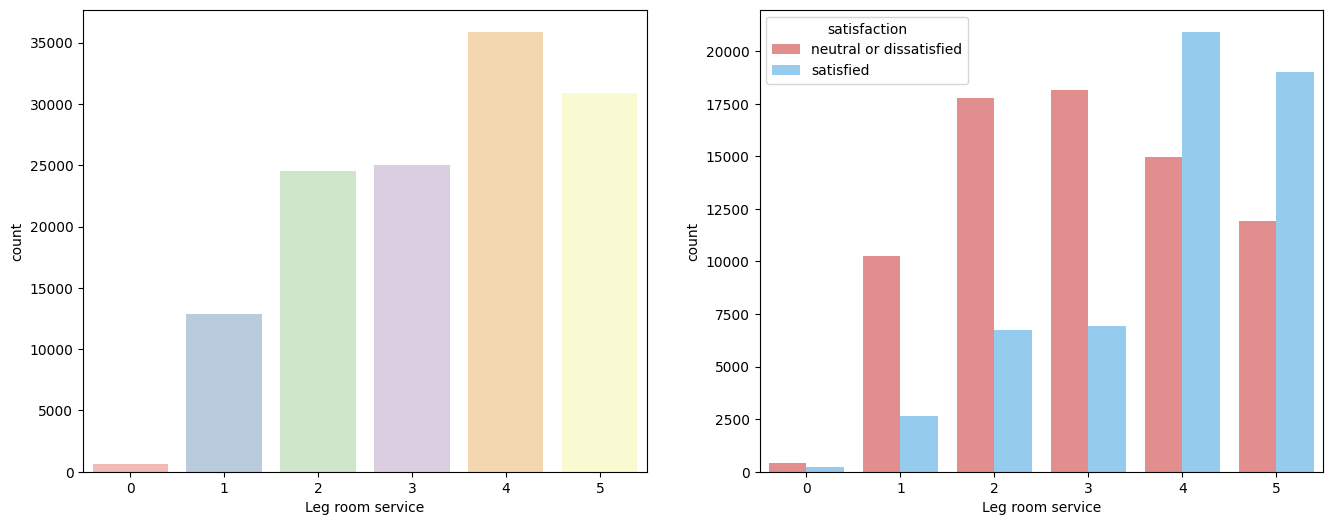

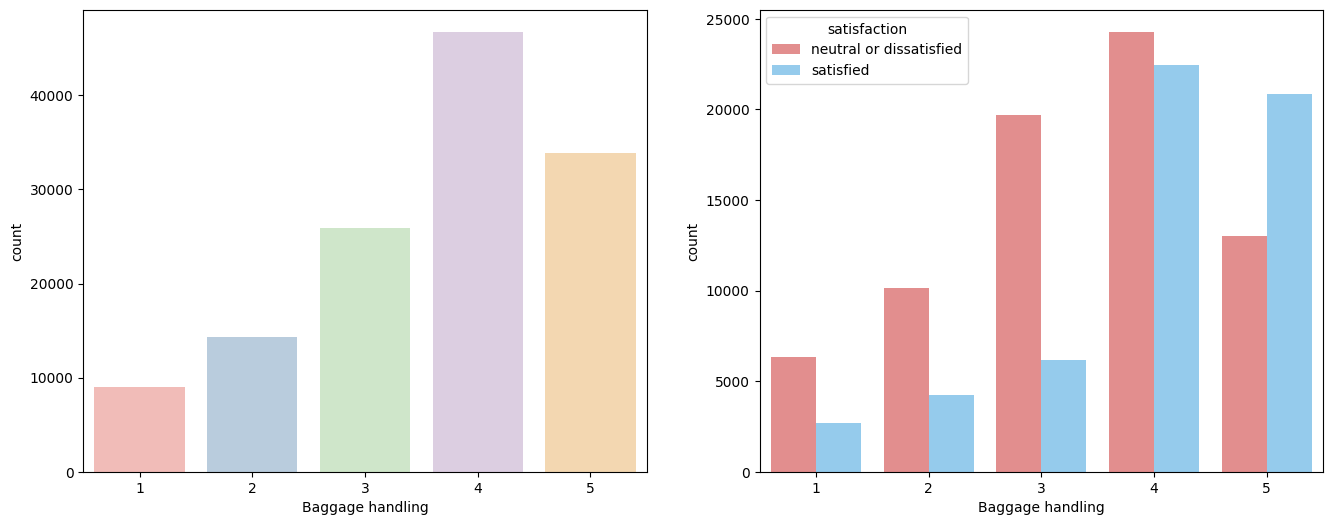

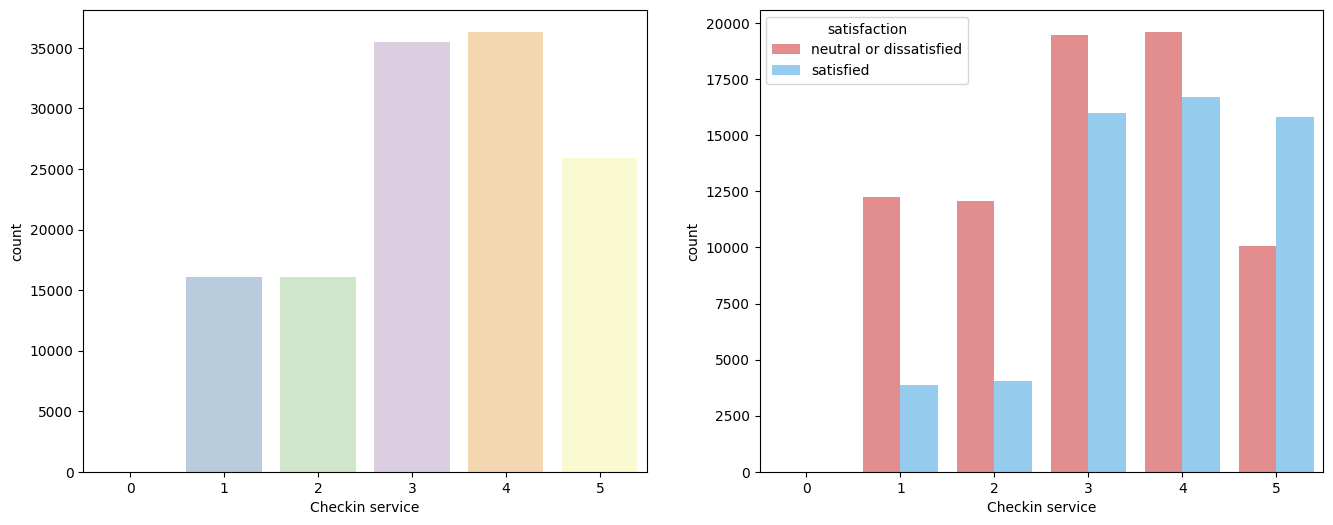

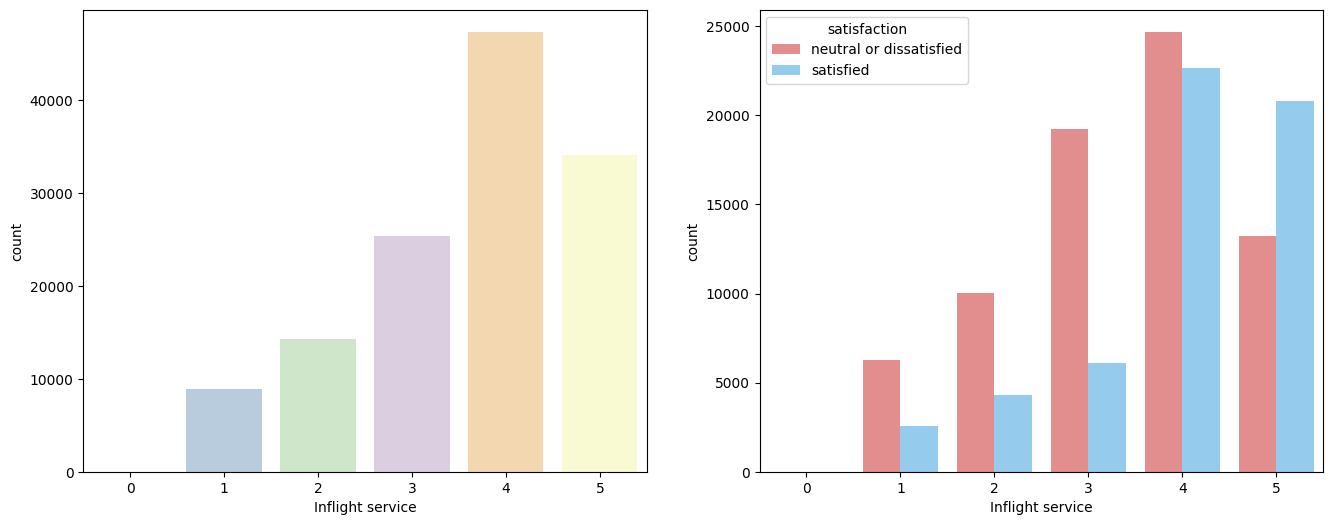

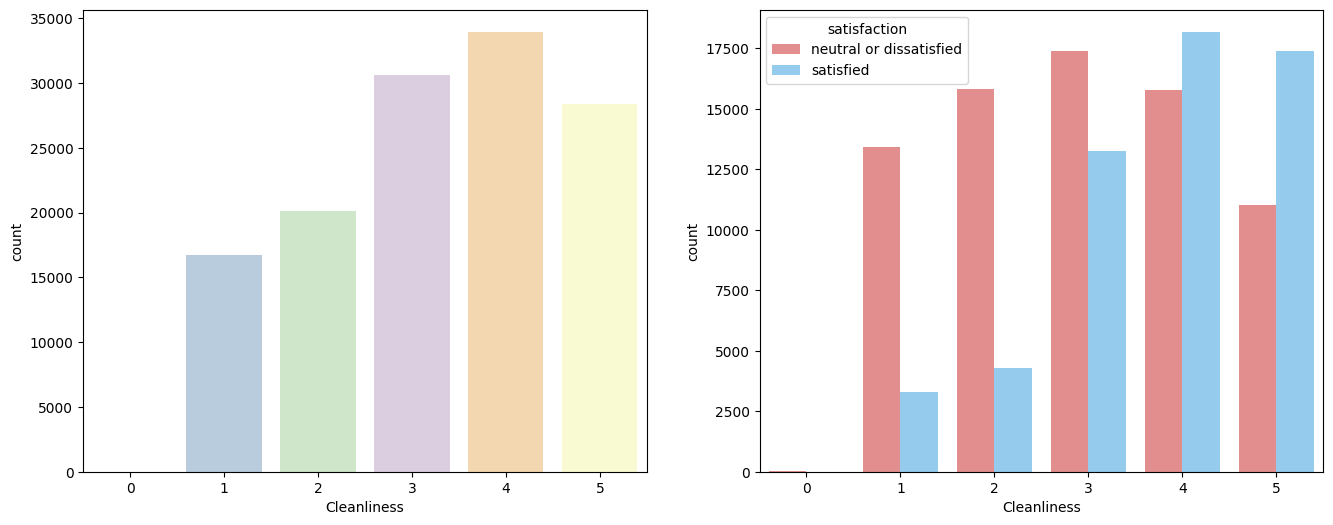

In [22]:
categorics=['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in categorics:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=ds[i],palette="Pastel1")

  plt.subplot(1,2,2)
  sns.countplot(x=ds[i],hue=ds.satisfaction, palette=["#f08080","#87cefa"])
  plt.show()

Кожний графік має дві панелі: ліва панель показує загальний розподіл кількості пасажирів за кожною категорією, а права панель показує розподіл кількості пасажирів за кожною категорією залежно від рівня задоволеності (синій - задоволений, червоний - незадоволений).

 Загалом, можна помітити, що нейтральні або незадоволені пасажири (оцінки 0-2) зустрічаються частіше на нижніх рівнях задоволеності, тоді як задоволені пасажири (оцінки 4-5) зустрічаються частіше на високих рівнях задоволеності. 

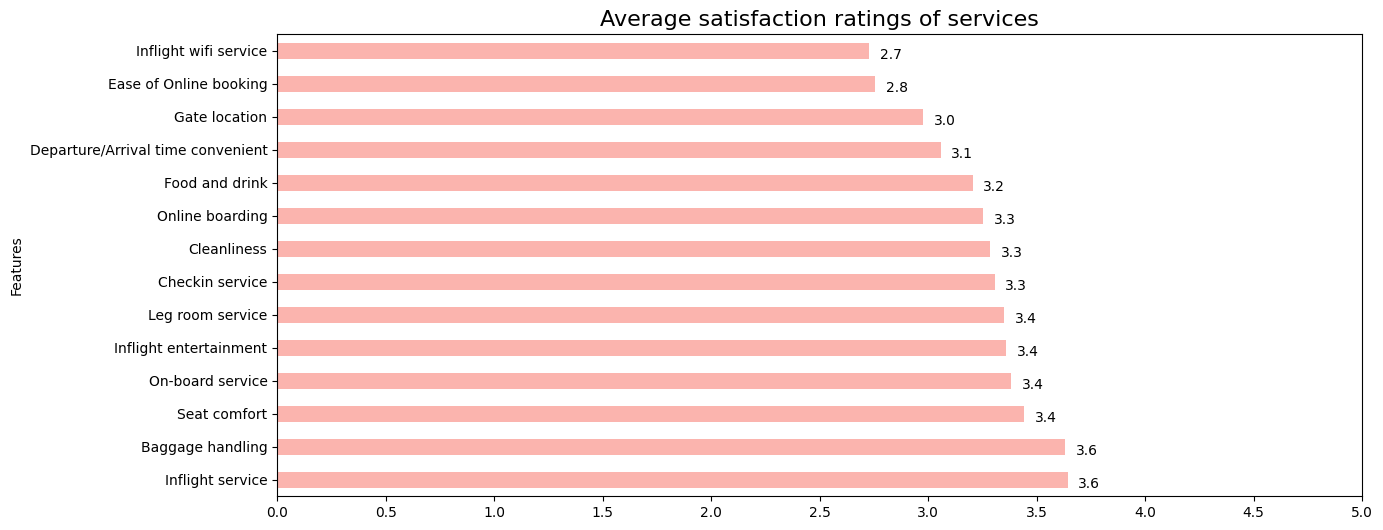

In [23]:
total = float(len(ds))
ax = ds[categorics].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(14,6))
plt.title('Average satisfaction ratings of services', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

Сервіс з найвищою середньою оцінкою задоволеності - це обслуговування на борту і обробка багажу з середньою оцінкою 3,6. Сервіс з найнижчою оцінкою задоволеності - це обслуговування Wi-Fi на борту з середньою оцінкою 2,7.

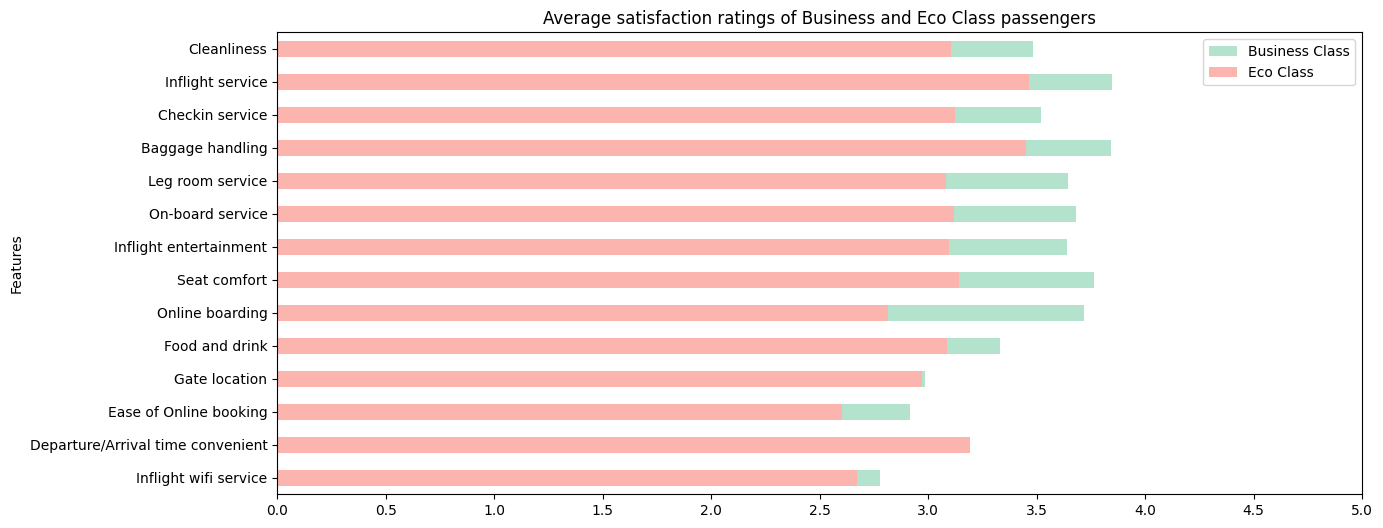

In [24]:
ds[ds["Class"]=="Business"].mean()[3:17].plot(kind="barh",legend=True,ylabel="Features",colormap="Pastel2",figsize=(14,6),label="Business Class",title="Average satisfaction ratings of Business and Eco Class passengers")
ds[ds["Class"]=="Eco"].mean()[3:17].plot(kind="barh",legend=True,colormap="Pastel1",label="Eco Class",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.show()

Ми бачимо, що пасажири бізнес-класу дають більшу оцінку послугам, ніж пасажири еко-класу.

Розбиваємо стовпчик з віком на чотири групи

In [25]:
ds["Age Group"]=pd.cut(ds.Age,[np.min(ds.Age),np.percentile(ds.Age,25),np.percentile(ds.Age,50),np.percentile(ds.Age,75),np.max(ds.Age)+1], right=False)

In [26]:
ds[["Age","Age Group"]][:5]

,Age,Age Group
0,13,"[7.0, 27.0)"
1,25,"[7.0, 27.0)"
2,26,"[7.0, 27.0)"
3,25,"[7.0, 27.0)"
4,61,"[51.0, 86.0)"


In [27]:
table2=ds.pivot_table(index=["Age Group"],columns=["satisfaction"],aggfunc={"satisfaction":"count"},fill_value=0)
table2

satisfaction          
satisfaction neutral or dissatisfied satisfied
Age Group                                     
[7.0, 27.0)                    22085      8910
[27.0, 40.0)                   19779     13289
[40.0, 51.0)                   13579     18636
[51.0, 86.0)                   18009     15593

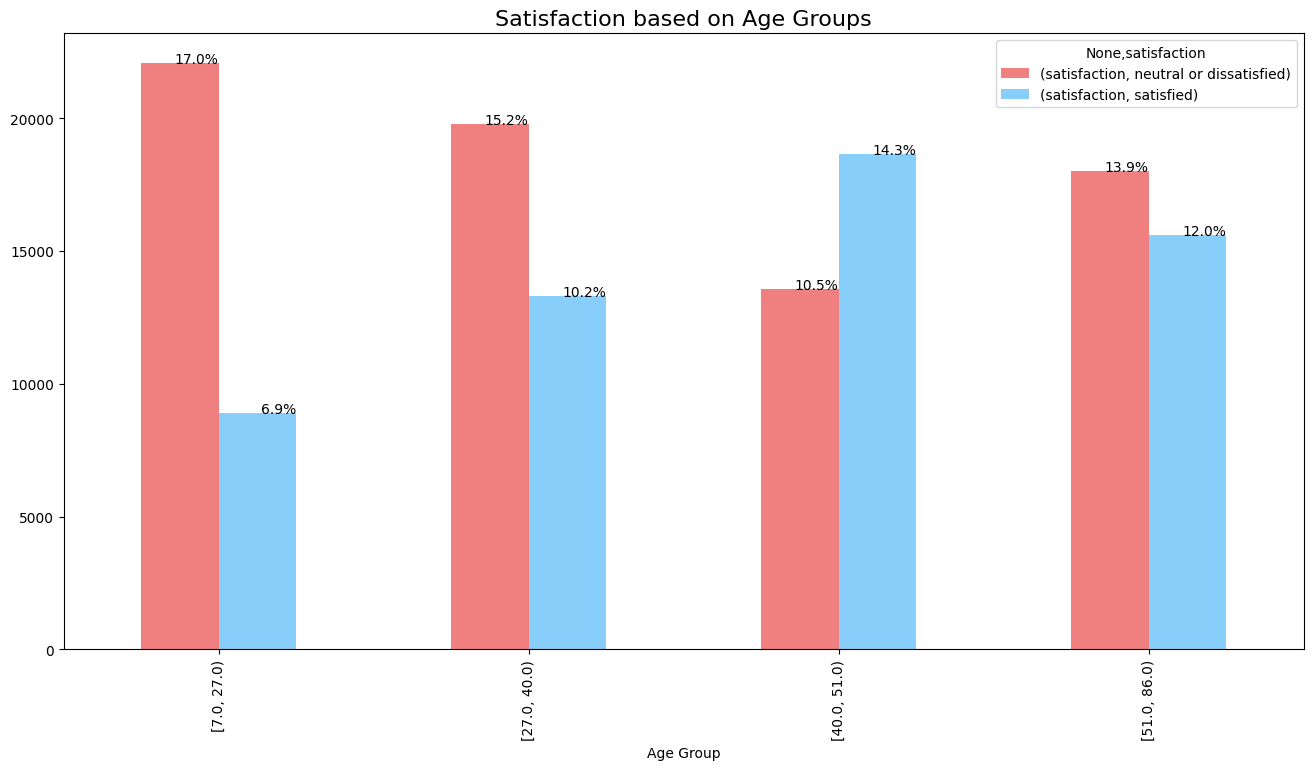

In [28]:
ax = table2.plot(kind="bar", figsize=(16,8), color=["#f08080","#87cefa"])
plt.title('Satisfaction based on Age Groups', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

Більшість пасажирів у віковому діапазоні [40,51) задоволені, але рівень незадоволеності вищий для пасажирів інших вікових груп.






Побудуємо графік типу "pairplot" для візуалізації розподілу числових ознак та їх взаємозв'язку з іншими числовими ознаками.

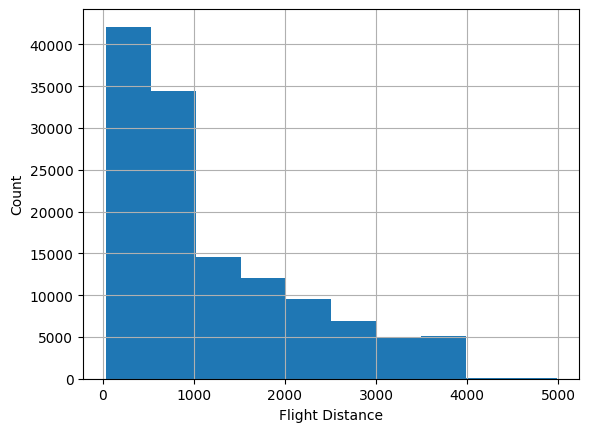

In [29]:
# Univariate Analysis - Histograms
ds['Flight Distance'].hist(bins=10)
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.show()

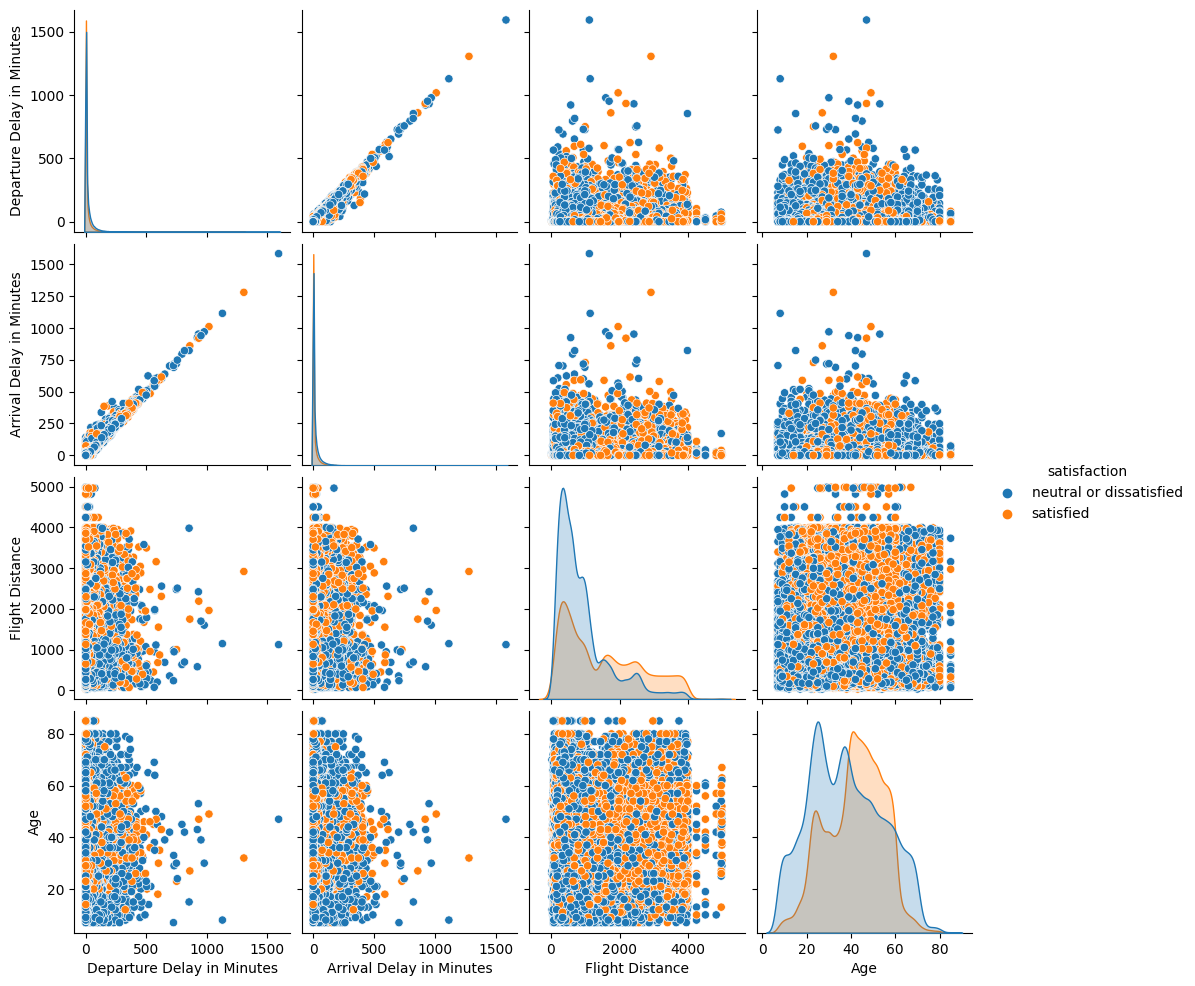

In [30]:
numerics=['Departure Delay in Minutes', 'Arrival Delay in Minutes','Flight Distance',"Age"]
sns.pairplot(ds[[*numerics,"satisfaction"]],hue="satisfaction")
plt.show()

Між числовими ознаками затримка прибуття у хвилинах та затримка вильоту у хвилинах спостерігається помітний зв'язок, інші не мають взаємозв'язку один з одним.

## Кореляція

<Axes: >

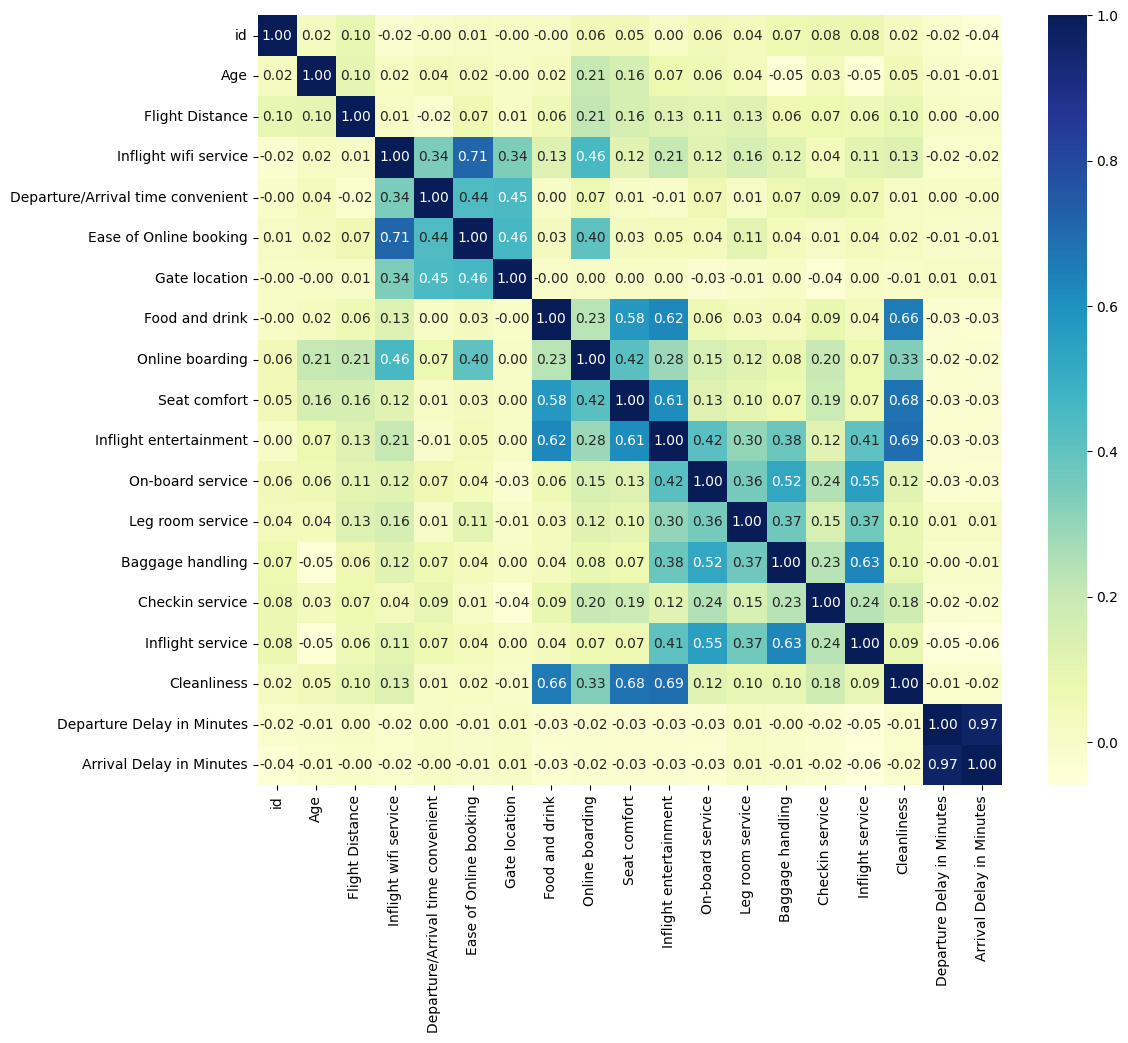

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(ds.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

Ця діаграма є тепловою картою кореляції між всіма числовими ознаками в датасеті. Кожен елемент на діаграмі показує кореляцію між двома ознаками. Кореляція - це міра того, наскільки сильно дві ознаки пов'язані між собою. Колір кожного елемента показує знак та силу кореляції. Чим темніший колір, тим сильніша кореляція.

"Ease of Online booking" та "Inflight wifi service" мають позитивну кореляцію з коефіцієнтом 0.71.
"Inflight entertainment" та "Food and drink" мають мають позитивну кореляцію з коефіцієнтом 0.62.
"Inflight entertainment" та "Seat comfort" мають позитивну кореляцію з коефіцієнтом 0.61.
"Inflight service" та "Baggage handling" мають позитивну кореляцію з коефіцієнтом 0.63.
"Cleanliness" та "Food and drink" мають позитивну кореляцію з коефіцієнтом 0.66.
"Cleanliness" та "Seat comfort" мають позитивну кореляцію з коефіцієнтом 0.68.
"Cleanliness" та "Inflight entertainment" мають позитивну кореляцію з коефіцієнтом 0.69.

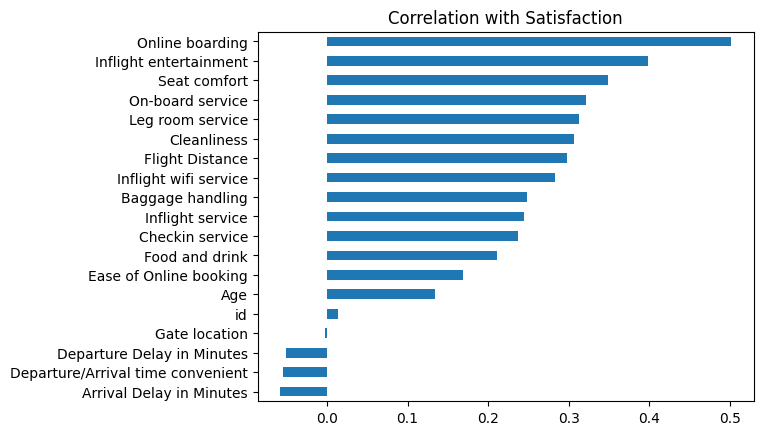

In [32]:
data_temp=ds.copy()
data_temp["satisfaction"]=data_temp["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
data_temp.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='barh',title="Correlation with Satisfaction")
plt.show()

З серед усіх ознак "Online boarding" має найбільшу кореляцію з цільовим показником. 

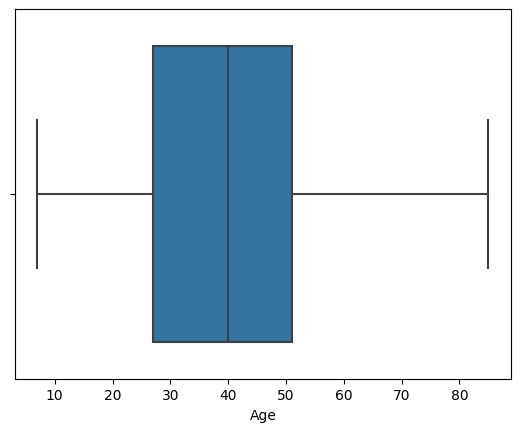

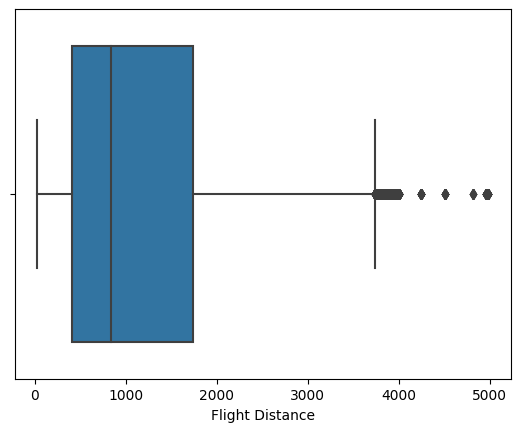

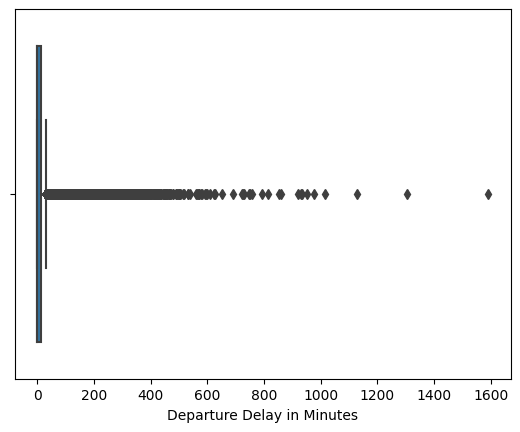

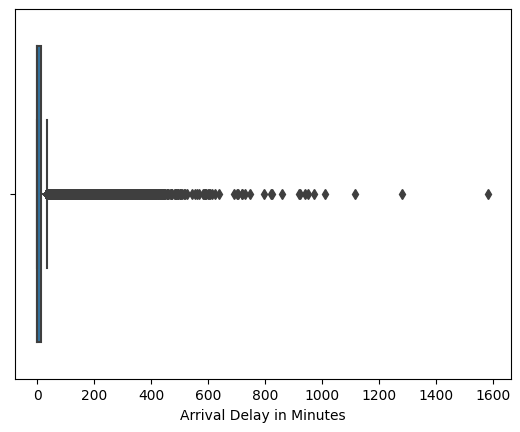

In [35]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for i in numerical_columns:
    # Outlier Detection - Box plot
    sns.boxplot(x=i, data=ds)
    plt.show()

У даних присутні викиди (аномалії). Я буду обробляти їх пізніше.